In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-prediction-dataset/house_prices_dataset.csv


In [3]:
X = np.array([
        [2, 3],
        [1, 1],
        [2, 1],
        [3, 2],
        [8, 8],
        [9, 8],
        [8, 9],
        [7, 7]
    ])

In [4]:
import matplotlib.pyplot as plt

In [5]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

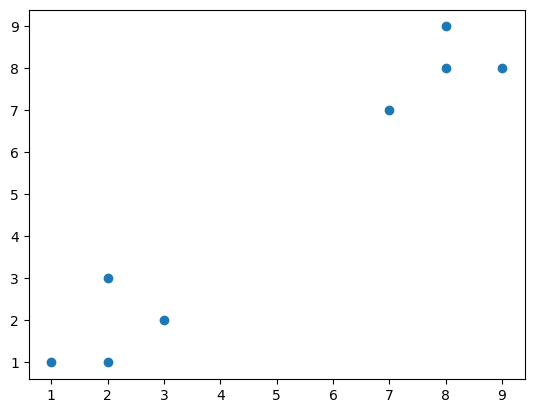

In [6]:
plt.scatter(X[:, 0], X[:,1])

In [7]:
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

In [8]:
class LinearSVM:
    def __init__(self, C=1.0, lr=0.01, n_iters=1000):
        self.C = C
        self.lr=lr
        self.n_iters = n_iters
        self.w = None
        self.b = None
    def _prepare_labels(self, y):
        y = np.array(y)
        unique = np.unique(y)
        if set(unique) == {0, 1}:
            y = np.where(y==0, -1, 1)
        elif set(unique) == {-1, 1}:
            pass
        else:
            raise ValueError("Labels must be in {0,1} or {-1, 1}")
        return y
    def fit(self, X, y):
        X = np.array(X)
        y = self._prepare_labels(y)

        n_samples, n_features = X.shape

        self.w = np.zeros(n_features)
        self.b = 0.0

        for _ in range(self.n_iters):
            scores = X.dot(self.w)+self.b

            margins = y* scores
            misclassified = margins < 1
            if not np.any(misclassified):
                dw = self.w
                db = 0.0
            else:
                X_mis = X[misclassified]
                y_mis = y[misclassified]

                dw = self.w + self.C * np.sum(-y_mis[:, np.newaxis] * X_mis, axis = 0)
                db = self.C * np.sum(-y_mis)
            self.w -= self.lr * dw
            self.b -= self.lr * db
        return self
    def decision_function(self, X):
        X = np.array(X)
        return X.dot(self.w) + self.b
    def predict(self, X):
        scores = self.decision_function(X)
        return np.where(scores >= 0, 1, -1)
    def predict_prototypes(self, X):
        return (self.predict(X)+1) // 2
        

In [9]:
svm = LinearSVM(C= 1.0, lr=0.001, n_iters=5000)
svm.fit(X, y)

In [10]:
svm.w, svm.b

(array([0.22936483, 0.22936443]), -2.162999999999933)

In [11]:
preds = svm.predict_prototypes(X)
print("Predictions:", preds)
print("True labels:", y)

Predictions: [0 0 0 0 1 1 1 1]
True labels: [0 0 0 0 1 1 1 1]


In [12]:
x_new = np.array([[3, 3], [9, 9]])
print("New points:", x_new)
print("Predicted classes:", svm.predict_prototypes(x_new))

New points: [[3 3]
 [9 9]]
Predicted classes: [0 1]


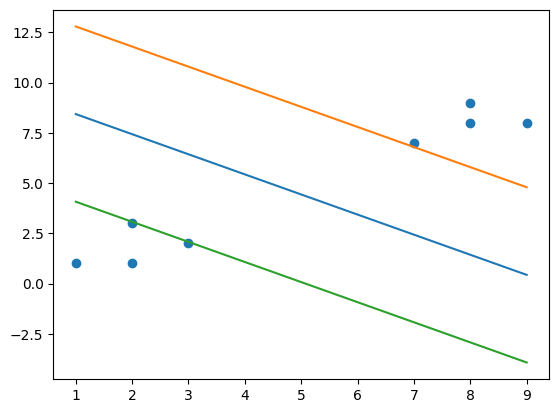

In [13]:
xx = np.linspace(min(X[:,0]), max(X[:,0]), 100)

# Decision boundary
yy = -(svm.w[0] * xx + svm.b) / svm.w[1]

# Margins
yy_margin1 = -(svm.w[0] * xx + svm.b - 1) / svm.w[1]
yy_margin2 = -(svm.w[0] * xx + svm.b + 1) / svm.w[1]

plt.scatter(X[:,0], X[:,1])
plt.plot(xx, yy)          # decision line
plt.plot(xx, yy_margin1)  # upper margin
plt.plot(xx, yy_margin2)  # lower margin
plt.show()